# Sentiment Analysis using Bi-directional RNNs, Bi-directional LSTM and Bi-directional GRU

In [18]:
# Importing packages
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Bidirectional, SimpleRNN, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [4]:
# Importing the dataset

df = pd.read_csv("Data/IMDB Dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
#removing the html
def clean_html(text):
    clean =re.compile('<.*?>')
    clean_text = re.sub(clean, '', text)
    return clean_text

In [8]:
# first round of cleaning
def clean_text1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]'%re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '' , text)
    return text

In [9]:
# second round of cleaning
def clean_text2(text):
    text = re.sub('['',"",,,]', '' ,text)
    text = re.sub('\n', '', text)
    return text

In [10]:
df['review_cleaned'] = pd.DataFrame(df.review.apply(lambda x : clean_html(x)))
df['review_cleaned'] = pd.DataFrame(df.review_cleaned.apply(lambda x : clean_text1(x)))
df['review_cleaned'] = pd.DataFrame(df.review_cleaned.apply(lambda x : clean_text2(x)))

In [11]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trun_type = 'post'

num_epochs = 30

In [12]:
tokenizer = Tokenizer(num_words= vocab_size, split= ' ')
tokenizer.fit_on_texts(df['review_cleaned'].values)

In [13]:
X = tokenizer.texts_to_sequences(df['review_cleaned'].values)
X= pad_sequences(X, maxlen= max_length, truncating= trun_type)

In [14]:
Y = pd.get_dummies(df['sentiment'], drop_first= True)

In [15]:
Y = to_categorical(Y, dtype= 'uint8')

In [16]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Bidirectional(SimpleRNN(64)))
model.add(Dense(2, activation= 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 128)               10368     
 al)                                                             
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 170626 (666.51 KB)
Trainable params: 170626 (666.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# compile the model
model.compile(optimizer= "adam",
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, stratify= Y, random_state= 317)

In [22]:
X_train.shape, y_train.shape


((40000, 120), (40000, 2))

In [23]:
X_test.shape, y_test.shape

((10000, 120), (10000, 2))

In [24]:
history_simpleRNN = model.fit(X_train, y_train, validation_data= (X_test,y_test),
                              epochs= num_epochs,
                              batch_size=128)

Epoch 1/30
313/313 [==============================] - 30s 74ms/step - loss: 0.6939 - accuracy: 0.5198 - val_loss: 0.6825 - val_accuracy: 0.5610
Epoch 2/30
313/313 [==============================] - 22s 71ms/step - loss: 0.5039 - accuracy: 0.7581 - val_loss: 0.5103 - val_accuracy: 0.7514
Epoch 3/30
313/313 [==============================] - 24s 76ms/step - loss: 0.3433 - accuracy: 0.8601 - val_loss: 0.4075 - val_accuracy: 0.8193
Epoch 4/30
313/313 [==============================] - 28s 89ms/step - loss: 0.2813 - accuracy: 0.8892 - val_loss: 0.4769 - val_accuracy: 0.7689
Epoch 5/30
313/313 [==============================] - 24s 75ms/step - loss: 0.2158 - accuracy: 0.9180 - val_loss: 0.4689 - val_accuracy: 0.8160
Epoch 6/30
313/313 [==============================] - 23s 72ms/step - loss: 0.1344 - accuracy: 0.9527 - val_loss: 0.5904 - val_accuracy: 0.7996
Epoch 7/30
313/313 [==============================] - 24s 77ms/step - loss: 0.0828 - accuracy: 0.9731 - val_loss: 0.7011 - val_accuracy:

In [25]:
def plot_graph_stats(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("num_epochs")
    plt.ylabel(string)
    plt.legend([string, 'val'+string])
    plt.show()


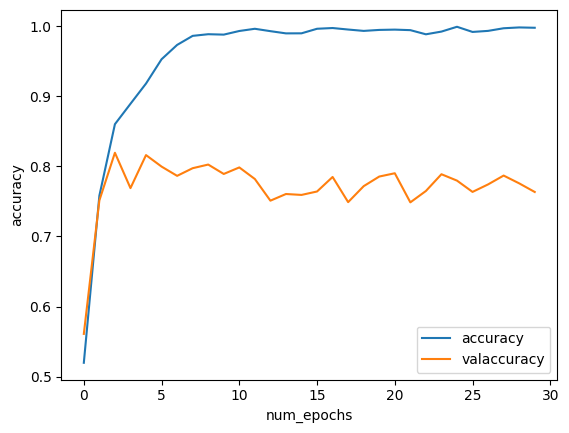

In [26]:
plot_graph_stats(history_simpleRNN, 'accuracy')

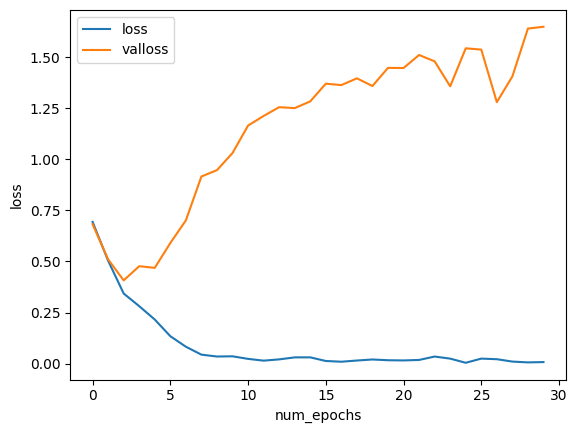

In [27]:
plot_graph_stats(history_simpleRNN, 'loss')

## Bidirectional LSTM

In [28]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model2.add(Bidirectional(LSTM(64)))
model2.add(Dense(2, activation= 'softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               41472     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 201730 (788.01 KB)
Trainable params: 201730 (788.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model2.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [32]:
# Train the model
history_Lstm = model2.fit(X_train, y_train, epochs= num_epochs,
                          validation_data=(X_test, y_test),
                          batch_size= 128)

Epoch 1/30
313/313 [==============================] - 107s 308ms/step - loss: 0.4489 - accuracy: 0.7756 - val_loss: 0.3510 - val_accuracy: 0.8482
Epoch 2/30
313/313 [==============================] - 94s 299ms/step - loss: 0.2956 - accuracy: 0.8807 - val_loss: 0.3707 - val_accuracy: 0.8462
Epoch 3/30
313/313 [==============================] - 99s 315ms/step - loss: 0.2573 - accuracy: 0.8985 - val_loss: 0.3596 - val_accuracy: 0.8429
Epoch 4/30
313/313 [==============================] - 101s 323ms/step - loss: 0.2306 - accuracy: 0.9100 - val_loss: 0.3699 - val_accuracy: 0.8422
Epoch 5/30
313/313 [==============================] - 97s 311ms/step - loss: 0.2083 - accuracy: 0.9194 - val_loss: 0.4554 - val_accuracy: 0.8363
Epoch 6/30
313/313 [==============================] - 100s 319ms/step - loss: 0.1828 - accuracy: 0.9302 - val_loss: 0.4241 - val_accuracy: 0.8339
Epoch 7/30
313/313 [==============================] - 91s 291ms/step - loss: 0.1552 - accuracy: 0.9418 - val_loss: 0.5374 - val

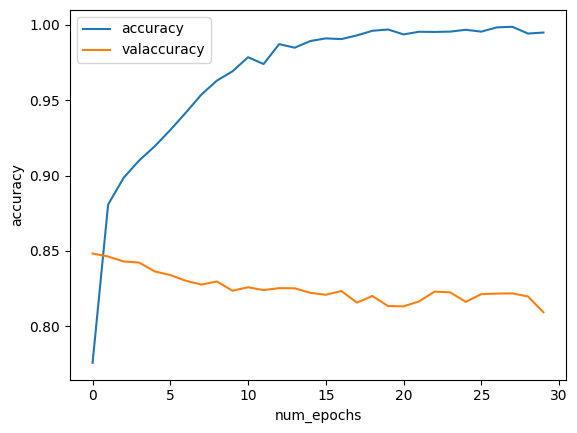

In [33]:
plot_graph_stats(history_Lstm, 'accuracy')

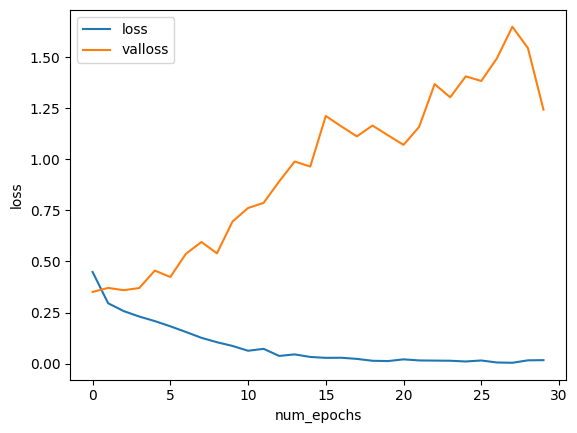

In [34]:
plot_graph_stats(history_Lstm, 'loss')

## Bidirectional GRU

In [35]:
model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model3.add(Bidirectional(GRU(64)))
model3.add(Dense(2, activation= 'softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               31488     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 191746 (749.01 KB)
Trainable params: 191746 (749.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model3.compile(optimizer= 'adam',
               loss= 'categorical_crossentropy',
               metrics= ['accuracy'])

In [37]:
history_GRU = model3.fit(X_train, y_train,
                         validation_data= (X_test, y_test),
                         epochs= num_epochs,
                         batch_size= 128)

Epoch 1/30
313/313 [==============================] - 82s 235ms/step - loss: 0.4875 - accuracy: 0.7356 - val_loss: 0.3574 - val_accuracy: 0.8405
Epoch 2/30
313/313 [==============================] - 55s 176ms/step - loss: 0.2924 - accuracy: 0.8787 - val_loss: 0.3456 - val_accuracy: 0.8489
Epoch 3/30
313/313 [==============================] - 56s 179ms/step - loss: 0.2416 - accuracy: 0.9036 - val_loss: 0.3829 - val_accuracy: 0.8429
Epoch 4/30
313/313 [==============================] - 56s 177ms/step - loss: 0.2055 - accuracy: 0.9199 - val_loss: 0.4071 - val_accuracy: 0.8398
Epoch 5/30
313/313 [==============================] - 55s 177ms/step - loss: 0.1763 - accuracy: 0.9331 - val_loss: 0.4294 - val_accuracy: 0.8325
Epoch 6/30
313/313 [==============================] - 56s 179ms/step - loss: 0.1458 - accuracy: 0.9466 - val_loss: 0.4687 - val_accuracy: 0.8252
Epoch 7/30
313/313 [==============================] - 79s 253ms/step - loss: 0.1202 - accuracy: 0.9578 - val_loss: 0.5634 - val_ac

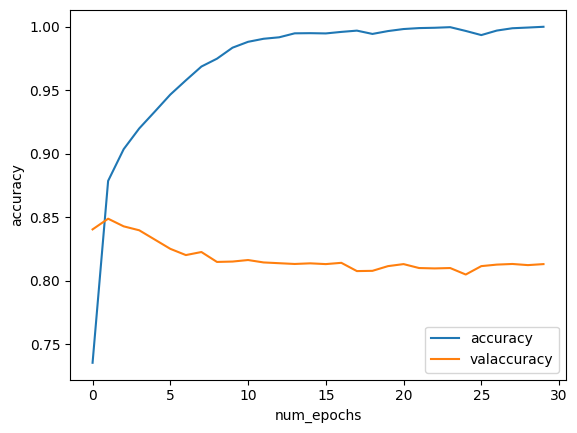

In [38]:
plot_graph_stats(history_GRU, 'accuracy')

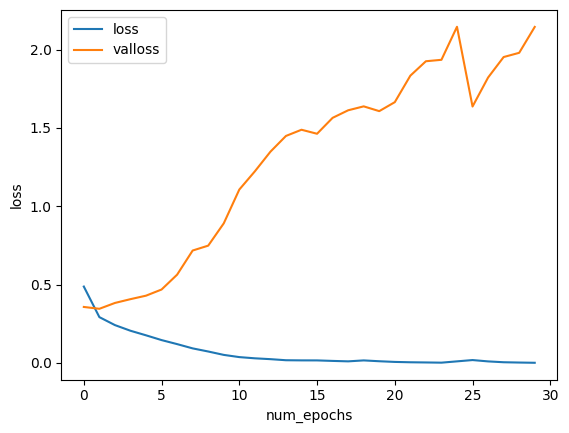

In [39]:
plot_graph_stats(history_GRU, 'loss')

### Building the same model but not using sequential

In [52]:
# Set the input and output dimensions
input_dim = 10000
output_dim = 2

# Create the input layers
inputs = tf.keras.Input(shape=(120), dtype= 'int32')


# Create the model 
x= tf.keras.layers.Embedding(input_dim,16)(inputs)
x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
# x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)

outputs = tf.keras.layers.Dense(output_dim, activation= 'softmax')(x)

model_4 = tf.keras.Model(inputs, outputs)

model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 120)]             0         
                                                                 
 embedding_11 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_11 (Bidirect  (None, 128)               41472     
 ional)                                                          
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 201730 (788.01 KB)
Trainable params: 201730 (788.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model_4.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [55]:
history_4 = model_4.fit(X_train, y_train, batch_size=128, epochs=num_epochs, validation_data=(X_test, y_test))


Epoch 1/30
313/313 [==============================] - 155s 462ms/step - loss: 0.4735 - accuracy: 0.7605 - val_loss: 0.3488 - val_accuracy: 0.8482
Epoch 2/30
313/313 [==============================] - 76s 242ms/step - loss: 0.3033 - accuracy: 0.8759 - val_loss: 0.3547 - val_accuracy: 0.8406
Epoch 3/30
313/313 [==============================] - 77s 247ms/step - loss: 0.2610 - accuracy: 0.8967 - val_loss: 0.3772 - val_accuracy: 0.8459
Epoch 4/30
313/313 [==============================] - 77s 246ms/step - loss: 0.2353 - accuracy: 0.9080 - val_loss: 0.3821 - val_accuracy: 0.8434
Epoch 5/30
313/313 [==============================] - 76s 244ms/step - loss: 0.2163 - accuracy: 0.9169 - val_loss: 0.4153 - val_accuracy: 0.8351
Epoch 6/30
313/313 [==============================] - 74s 236ms/step - loss: 0.1929 - accuracy: 0.9273 - val_loss: 0.4357 - val_accuracy: 0.8350
Epoch 7/30
313/313 [==============================] - 72s 231ms/step - loss: 0.1776 - accuracy: 0.9339 - val_loss: 0.5470 - val_a

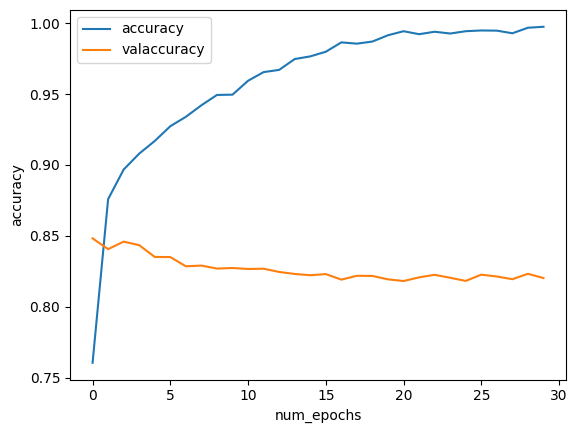

In [56]:
plot_graph_stats(history_4, 'accuracy')

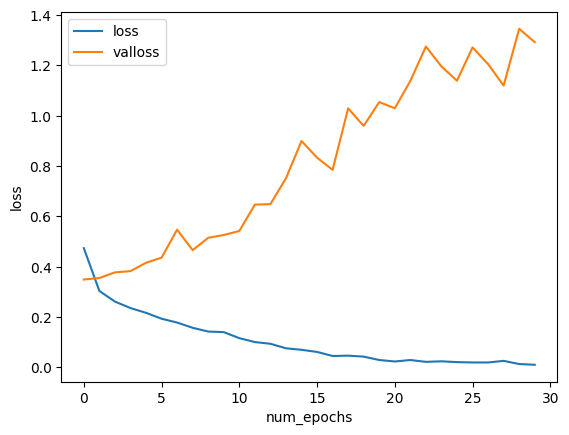

In [57]:
plot_graph_stats(history_4, 'loss')

In [58]:
predictions = model_4.predict(X_test[:4])
for pred in predictions:
    print(np.argmax(pred[0]))


1/1 [==============================] - 6s 6s/step
0
0
0
0
